## Task 1:
### Problem - Develop and evaluate an image classifier using Convolution Neural Network.

### The Data = CIFAR 10 datset.

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.
https://www.cs.toronto.edu/~kriz/cifar.html


# CIFAR-10 Multiple Classes
# New section
Example of using Keras for CNNs. Use a famous data set, the CIFAR-10 dataset which consists of 10 different image types.

In [ ]:
#
# Your code to import matplotlib, pandas and numpy libraries
#

from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report
import itertools

%matplotlib inline

Following code loads the CIFAR 10 datset.

In [ ]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
#
# Your code to print shapes of training and test data. Check how the data looks
#

# Printing shapes of the data
# Printing shapes of the data
print("Shape of training data (x_train):", x_train.shape)
print("Shape of training labels (y_train):", y_train.shape)
print("Shape of test data (x_test):", x_test.shape)
print("Shape of test labels (y_test):", y_test.shape)

Shape of training data (x_train): (50000, 32, 32, 3)
Shape of training labels (y_train): (50000, 1)
Shape of test data (x_test): (10000, 32, 32, 3)
Shape of test labels (y_test): (10000, 1)


In [ ]:
# Your code to print the shape of one image.
sample_image = x_train[0]

# Printing the shape of the selected image
print("Shape of one image:", sample_image.shape)

Shape of one image: (32, 32, 3)


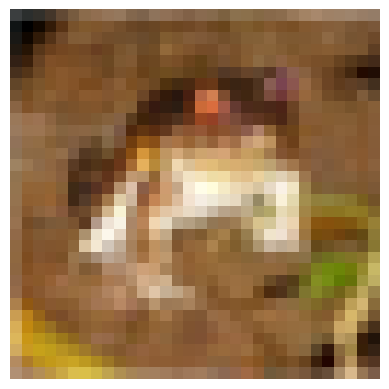

In [ ]:
# Your code to show any sample image in the dataset. Use - plt.imshow()
sample_image = x_train[0]

# Display the sample image
plt.imshow(sample_image)
plt.axis('off')  # Hide axes
plt.show()

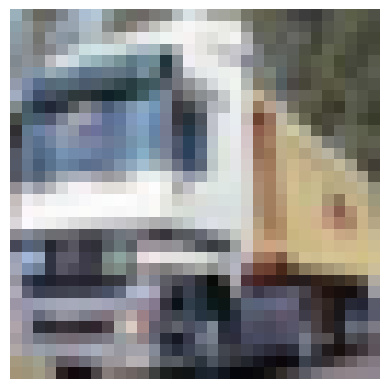

In [ ]:
# Show any other image
sample_image = x_train[1]

# Display the sample image
plt.imshow(sample_image)
plt.axis('off')  # Hide axes
plt.show()

# PreProcessing

In [ ]:
# Your code to print one image in digitals. Check how pixels look like.
sample_image = x_train[0]

# Printing pixel values of the sample image
print("Pixel values of one image:")
for row in sample_image:
    for pixel in row:
        print(pixel, end=" ")
    print()

Pixel values of one image:
[59 62 63] [43 46 45] [50 48 43] [68 54 42] [98 73 52] [119  91  63] [139 107  75] [145 110  80] [149 117  89] [149 120  93] [131 103  77] [125  99  76] [142 115  91] [144 112  86] [137 105  79] [129  97  71] [137 106  79] [134 106  76] [124  97  64] [139 113  78] [139 112  75] [133 105  69] [136 105  74] [139 108  77] [152 120  89] [163 131 100] [168 136 108] [159 129 102] [158 130 104] [158 132 108] [152 125 102] [148 124 103] 
[16 20 20] [0 0 0] [18  8  0] [51 27  8] [88 51 21] [120  82  43] [128  89  45] [127  86  44] [126  87  50] [116  79  44] [106  70  37] [101  67  35] [105  70  36] [113  74  35] [109  70  33] [112  72  37] [119  79  44] [109  71  33] [105  69  27] [125  89  46] [127  92  46] [122  85  39] [131  89  47] [124  82  41] [121  79  37] [131  89  48] [132  91  53] [133  94  58] [133  96  60] [123  88  55] [119  83  50] [122  87  57] 
[25 24 21] [16  7  0] [49 27  8] [83 50 23] [110  72  41] [129  92  54] [130  93  55] [121  82  47] [113  77

In [ ]:
# Your code to print shape of any image i.e particular value in the x_train
index_of_image = 10  # Change this index to select a different image
selected_image = x_train[index_of_image]

# Printing the shape of the selected image
print("Shape of the selected image:", selected_image.shape)

Shape of the selected image: (32, 32, 3)


In [ ]:
# Your code to print the maximum value in x_train. Hint - Use .max()
max_value = x_train.max()

# Print the maximum value
print("Maximum value in x_train:", max_value)

Maximum value in x_train: 255


In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
# Print the shape of x_train again.
print(x_train.shape)

(50000, 32, 32, 3)


In [ ]:
# Print the shape of y_train again.
print(y_train.shape)

(50000, 1)


# One hot vector encoding.
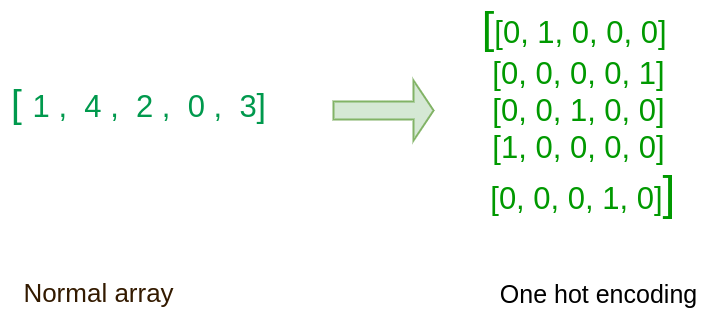


The "to_categorical()" is converting the integer value to binary categorical matrix :: https://keras.io/api/utils/python_utils/#to_categorical-functionLinks to an external site.

In [ ]:
from tensorflow.keras.utils import to_categorical

# Your code to print shape of y_train [0]
print("Shape of y_train[0]:", y_train[0].shape)

# Your code to use to_categorical to convert integers to numbers. Assign the new array to the variable y_cat_train
# Using to_categorical to convert integers to one-hot encoded numbers
y_cat_train = to_categorical(y_train)

# Printing shape of y_cat_train
print("Shape of y_cat_train:", y_cat_train.shape)

Shape of y_train[0]: (1,)
Shape of y_cat_train: (50000, 10)


In [ ]:
# Your code to print shape of the array y_cat_train
print("Shape of y_cat_train:", y_cat_train.shape)

Shape of y_cat_train: (50000, 10)


In [ ]:
# Your code to print any single value in the array y_cat_train and print y_train with the same index.

# Compare the result for better understanding of "to_categorical()"
index = 0

# Printing a single value from y_cat_train and y_train with the same index
print("Value in y_cat_train:", y_cat_train[index])
print("Corresponding value in y_train:", y_train[index])

Value in y_cat_train: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Corresponding value in y_train: [6]


In [ ]:
# Your code to:
# Convert y_test to the encoded vector in same manner/ Assign it to the variable y_cat_test

# Print the shapes to look how y_cat_test looks.
y_cat_test = to_categorical(y_test)

# Print the shapes of y_test, y_cat_test, and y_train
print("Shape of y_test:", y_test.shape)
print("Shape of y_cat_test:", y_cat_test.shape)
print("Shape of y_train:", y_train.shape)

Shape of y_test: (10000, 1)
Shape of y_cat_test: (10000, 10)
Shape of y_train: (50000, 1)


----------
# Building the Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

#### Please read the following links before creating code for the next cell

https://keras.io/api/layers/convolution_layers/convolution2d/
    
https://keras.io/api/layers/pooling_layers/max_pooling2d/

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create the sequential model
model = Sequential()

# Add layers to the model
model.add(Conv2D(filters=32, kernel_size=(4, 4), input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Print model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 256)               2

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 256)               2

### We could use early stopping in Keras to break from the training.
### What this does is for successive iterations it monitors the loss. If the loss does not decreases for a certain number of iterations denoted by variable 'patience' then the training stops.
### Following code shows how you can use early stopping.


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
# Your code to compile the models (model.compile). Use 'categorical cross entropy' as the loss function
# and use 'accuracy' as the metrics
# Your can use the optimiser of your choice
from tensorflow.keras.optimizers import Adam

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Your code to fit the model (model.fit). Use additional parameter -  callbacks = [early_stop] to eanable early stopping.
# use 'history' array to save the training parameters for each epoch
# Fit the model with early stopping
history = model.fit(x_train, y_cat_train, epochs=20, validation_data=(x_test, y_cat_test), callbacks=[early_stop])


Epoch 1/20
1563/1563 [==============================] - 25s 8ms/step - loss: 1.4439 - accuracy: 0.4783 - val_loss: 1.1482 - val_accuracy: 0.5995
Epoch 2/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0948 - accuracy: 0.6134 - val_loss: 1.0255 - val_accuracy: 0.6384
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9407 - accuracy: 0.6714 - val_loss: 0.9930 - val_accuracy: 0.6597
Epoch 4/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8246 - accuracy: 0.7114 - val_loss: 0.9762 - val_accuracy: 0.6680
Epoch 5/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7171 - accuracy: 0.7487 - val_loss: 0.9220 - val_accuracy: 0.6884
Epoch 6/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6260 - accuracy: 0.7817 - val_loss: 0.9889 - val_accuracy: 0.6787
Epoch 7/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.5397 - accuracy: 0.8110 - val_loss: 0.9914 - val_accuracy

### We can save the model in a file. Following code shows how to do this.

In [ ]:
# Careful, don't overwrite file!
model.save('cifar_10epochs.keras')

### We can save the loss at every step. Following code shows how to do this.

In [ ]:
import pandas as pd
losses = pd.DataFrame(model.history.history)

In [ ]:
# Print first few rows of losses.
print(losses.head())

       loss  accuracy  val_loss  val_accuracy
0  1.443916   0.47826  1.148245        0.5995
1  1.094824   0.61338  1.025463        0.6384
2  0.940694   0.67142  0.992983        0.6597
3  0.824626   0.71140  0.976234        0.6680
4  0.717142   0.74868  0.921978        0.6884


### Visualise a plot between accuracy vs val_accuracy for all steps.

### x axis will have the steps (epochs)
### y axis will have accuracy and val_accuracy





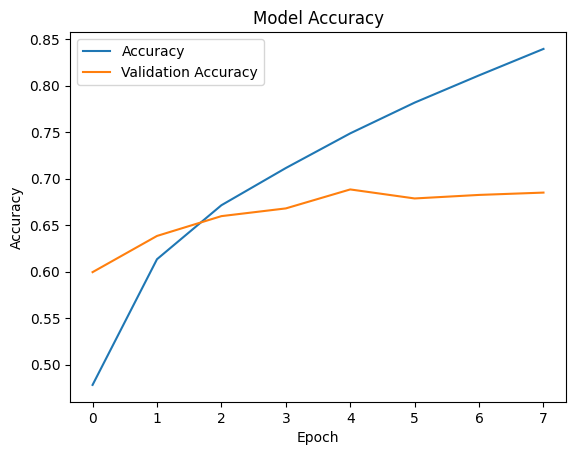

In [ ]:
#
# Your code to plot accuracy and val_accuracy vs the epochs
#
import matplotlib.pyplot as plt

# Plot accuracy and validation accuracy versus epochs
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

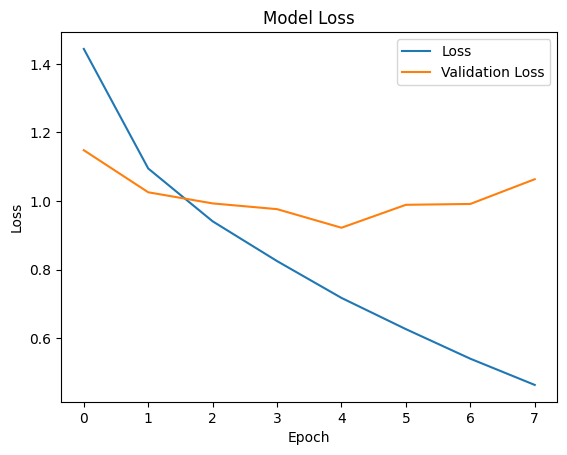

In [ ]:
#
# Your code to plot loss and val_loss vs the epochs
#
import matplotlib.pyplot as plt

# Plot loss and validation loss versus epochs
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### You could print the metrics name that model have used.

### Following code shows how to do this.

In [ ]:
model.metrics_names

['loss', 'accuracy']

### Following code shows how to evaluate your model.

In [ ]:
model.evaluate(x_test,y_cat_test,verbose=0)

[1.063565969467163, 0.6850000023841858]

### Make a prediction on test data set.   

In [ ]:
predictions_prob = model.predict(x_test)
predictions = predictions_prob.argmax(axis = -1)

313/313 [==============================] - 1s 2ms/step


### We could get the full classification report.

In [ ]:
# Your code to import classification_report library from sklearn.metrics
from sklearn.metrics import classification_report


In [ ]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.72      0.74      0.73      1000\n           1       0.71      0.89      0.79      1000\n           2       0.57      0.62      0.60      1000\n           3       0.49      0.51      0.50      1000\n           4       0.66      0.57      0.61      1000\n           5       0.65      0.46      0.54      1000\n           6       0.75      0.78      0.77      1000\n           7       0.72      0.78      0.75      1000\n           8       0.77      0.81      0.79      1000\n           9       0.80      0.69      0.74      1000\n\n    accuracy                           0.69     10000\n   macro avg       0.68      0.69      0.68     10000\nweighted avg       0.68      0.69      0.68     10000\n'

### We could also get and plot confusion matrix.

https://github.com/matplotlib/matplotlib/issues/14751

In [ ]:
# Your code to import confusion_matrix library from sklearn.metrics
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,predictions)

array([[744,  40,  58,  16,  14,   4,  10,  11,  82,  21],
       [ 12, 885,   5,   8,   4,   2,   3,   2,  26,  53],
       [ 57,  12, 618,  73,  70,  45,  61,  34,  18,  12],
       [ 37,  28,  86, 510,  76, 108,  63,  51,  18,  23],
       [ 34,   5, 103,  72, 567,  33,  71,  91,  20,   4],
       [ 20,  13,  89, 224,  52, 463,  37,  75,  18,   9],
       [ 13,  16,  53,  66,  23,  18, 783,  12,   9,   7],
       [ 22,  15,  38,  40,  38,  38,  12, 775,   7,  15],
       [ 64,  55,  14,  11,  11,   2,   3,   4, 812,  24],
       [ 32, 175,  13,  15,   3,   2,   4,  19,  44, 693]])

<Axes: >

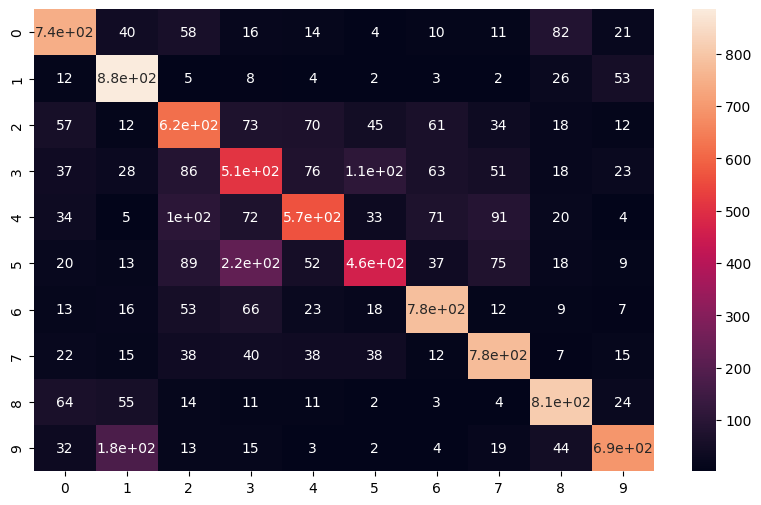

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)


# Following code makes a prediction on specific image.

In [ ]:
my_image = x_test[16]

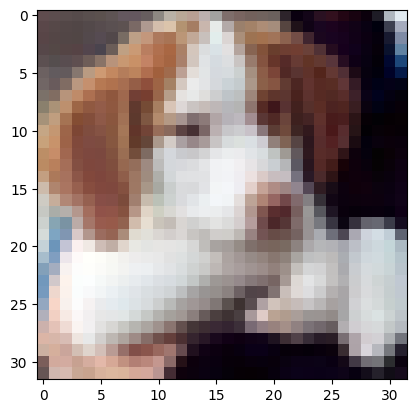

In [ ]:
plt.imshow(my_image)

In [ ]:
# SHAPE --> (num_images,width,height,color_channels)

model.predict(my_image.reshape(1,32,32,3))

1/1 [==============================] - 0s 164ms/step


array([[3.4179536e-07, 1.2208482e-05, 2.2071252e-05, 6.0970131e-03,
        3.4011996e-06, 9.9352622e-01, 1.0447518e-05, 4.8398342e-05,
        1.8770594e-05, 2.6114591e-04]], dtype=float32)

In [ ]:
# Find the highest probability value in the vector above.
# What output value does it point to?


In [ ]:
# Check your result to run the code:

np.argmax(model.predict(my_image.reshape(1,32,32,3)), axis = -1)

1/1 [==============================] - 0s 19ms/step


array([5])

### Let's use a trained neural network
You can run the following code many times

Note the recognition probabilities for each image

1/1 [==============================] - 0s 19ms/step


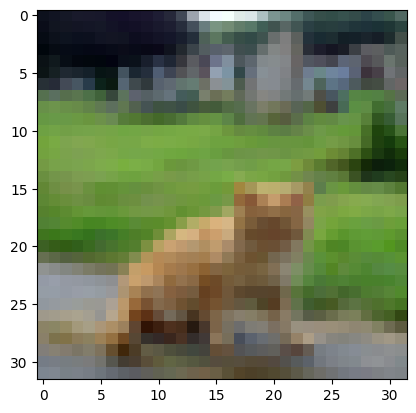

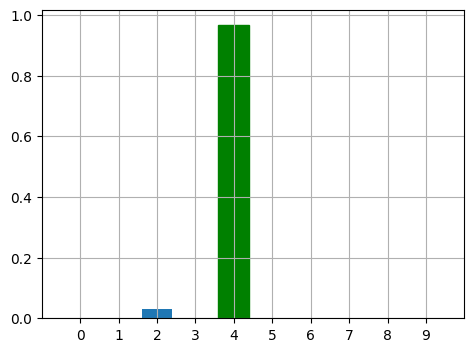

The predicted answer: deer 
 Correct answer: cat
['aircraft', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'hors', 'ship', 'truck']


In [ ]:
from tensorflow.keras.preprocessing.image import array_to_img
import random
# Class names in the CIFAR-10 dataset
classes=['aircraft', 'car', 'bird', 'cat', 'deer',
'dog', 'frog', 'hors', 'ship', 'truck']

# we take a random element 'random.randint()' from the test sample
# and observe: the neural network will guess or not
index = random.randint(0, x_test.shape[0])
plt.imshow(array_to_img(x_test[index]))

# test image conversion
x = x_test[index]
x = np.expand_dims(x, axis=0)

# start recognition
prediction = model.predict(x)
sample = x

# converting the result from one hot encoding format
ans = np.argmax(prediction)

fig = plt.figure(figsize=(12,4))

ax = fig.add_subplot(1, 2, 2)
bar_list = ax.bar(np.arange(10), prediction[0], align='center')
bar_list[ans].set_color('g')
ax.set_xticks(np.arange(10))
ax.set_xlim([-1, 10])
ax.grid('on')

plt.show()

print('The predicted answer: {}'.format((classes[ans])), "\n",
     'Correct answer: {}'.format(classes[y_test[index][0]]) )

print(classes)


# You can run this cell many times, and each time you will get a new picture,which
# this neural network will recognise with the probability indicated on the graph.

## Task 2:

Evaluate your model for different optimisers available in the Keras.

https://keras.io/api/optimizers/

- Store the optimisers in an array.
- Use for loop to fit, compile, and  test your model.
- Plot the accuracy vs optimiser


Training model with Adam optimizer...
Epoch 1/3
1563/1563 [==============================] - 11s 5ms/step - loss: 1.4258 - accuracy: 0.4898 - val_loss: 1.2155 - val_accuracy: 0.5729
Epoch 2/3
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0861 - accuracy: 0.6173 - val_loss: 1.0163 - val_accuracy: 0.6483
Epoch 3/3
313/313 [==============================] - 1s 3ms/step - loss: 0.9409 - accuracy: 0.6772
Training model with Adadelta optimizer...
Epoch 1/3
1563/1563 [==============================] - 10s 5ms/step - loss: 0.7617 - accuracy: 0.7366 - val_loss: 0.9083 - val_accuracy: 0.6890
Epoch 2/3
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7466 - accuracy: 0.7417 - val_loss: 0.9032 - val_accuracy: 0.6912
Epoch 3/3
313/313 [==============================] - 1s 3ms/step - loss: 0.9002 - accuracy: 0.6912
Training model with Adagrad optimizer...
Epoch 1/3
1563/1563 [==============================] - 9s 5ms/step - loss: 0.7245 - accuracy: 0.7492 - val_

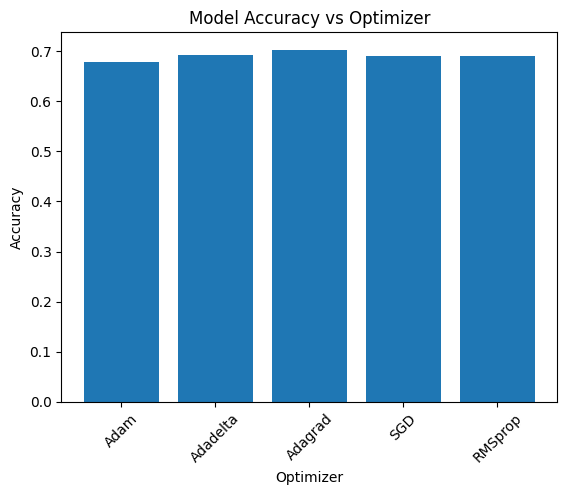

In [ ]:
# Create a list containing the names of optimisers (Don't use 'AdamW' and 'Adafactor')
# Create an empty list to store scores

# For every optimiser
   # compile your model
   # fit your model, use epochs=3 for each optimiser (otherwise the training will take a long time)
   # using model.evaluate() find score and append the score in a list

# Plot score vs optimiser
from tensorflow.keras.optimizers import Adam, Adadelta, Adagrad, SGD, RMSprop
import matplotlib.pyplot as plt

# Create a list of optimizers (excluding 'AdamW' and 'Adafactor')
optimizers = ['Adam', 'Adadelta', 'Adagrad', 'SGD', 'RMSprop']

# Create an empty list to store scores
scores = []

# Define model architecture
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(4, 4), input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# For each optimizer
for optimizer_name in optimizers:
    print(f"Training model with {optimizer_name} optimizer...")

    # Compile the model with the current optimizer
    optimizer = eval(optimizer_name)()
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Fit the model
    history = model.fit(x_train, y_cat_train, epochs=3, validation_data=(x_test, y_cat_test))

    # Evaluate the model and get the score
    score = model.evaluate(x_test, y_cat_test)[1]  # Using index 1 to get accuracy
    scores.append(score)

# Plot score vs optimiser
plt.bar(optimizers, scores)
plt.xlabel('Optimizer')
plt.ylabel('Accuracy')
plt.title('Model Accuracy vs Optimizer')
plt.xticks(rotation=45)
plt.show()


# Lab logbook requirement:
# Please ensure to document in your laboratory logbook a graphical representation depicting the train loss and validation loss trends.
# Based on this analysis, determine the optimal number of epochs for training your model.